# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# This version of code will provide some insights into the data analysis conducted.
# The code is heavily inspired from TA Drew's speedruns.
# For more information about the code's function, refer to the README file.

In [3]:
pip install citipy

  Using cached citipy-0.0.6.tar.gz (675 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=8d8c881a8ee162abfca148db1c97fa0cf53b878c6c246195d00c39ee37e76f05
  Stored in directory: c:\users\josep\appdata\local\pip\cache\wheels\41\82\37\8bb56372b0d828d226b83e0117780ecbe9f409100ac52364bd
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mariupol
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | utrik
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | pacific grove
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | tidjikja
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | afaahiti
Processing Record 14 of Set 1 | bamboo flat
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | port hueneme
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | inhambane
Processing Record 19 of Set 1 | uturoa
Processing Record 20 of Set 1 | ponta delgada
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | yaguajay

Processing Record 38 of Set 4 | rukban
City not found. Skipping...
Processing Record 39 of Set 4 | ad dawadimi
Processing Record 40 of Set 4 | alotau
City not found. Skipping...
Processing Record 41 of Set 4 | sola
Processing Record 42 of Set 4 | manggar
Processing Record 43 of Set 4 | urazovo
Processing Record 44 of Set 4 | biloela
Processing Record 45 of Set 4 | udachny
Processing Record 46 of Set 4 | yuzhno-kurilsk
Processing Record 47 of Set 4 | kone
Processing Record 48 of Set 4 | rio grande
Processing Record 49 of Set 4 | nizhnevartovsk
Processing Record 0 of Set 5 | xiannu
Processing Record 1 of Set 5 | sisimiut
Processing Record 2 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 3 of Set 5 | selibaby
Processing Record 4 of Set 5 | colonia
Processing Record 5 of Set 5 | dinanagar
Processing Record 6 of Set 5 | zaoyang
Processing Record 7 of Set 5 | palikir - national government center
Processing Record 8 of Set 5 | mount pearl
Processing Record 9 of Set 5 | ve

Processing Record 30 of Set 8 | sambava
Processing Record 31 of Set 8 | padang
Processing Record 32 of Set 8 | tremp
Processing Record 33 of Set 8 | lobujya
Processing Record 34 of Set 8 | san patricio
Processing Record 35 of Set 8 | tocopilla
Processing Record 36 of Set 8 | geraldton
Processing Record 37 of Set 8 | santo antonio
Processing Record 38 of Set 8 | tukrah
Processing Record 39 of Set 8 | hammerfest
Processing Record 40 of Set 8 | al ghayzah
Processing Record 41 of Set 8 | yulinshi
Processing Record 42 of Set 8 | miahuatlan de porfirio diaz
Processing Record 43 of Set 8 | teshi old town
Processing Record 44 of Set 8 | pangody
Processing Record 45 of Set 8 | manokwari
Processing Record 46 of Set 8 | chiang rai
Processing Record 47 of Set 8 | vuktyl
Processing Record 48 of Set 8 | zarinsk
Processing Record 49 of Set 8 | kosciuszko national park
City not found. Skipping...
Processing Record 0 of Set 9 | ghazni
Processing Record 1 of Set 9 | karratha
Processing Record 2 of Set 9

Processing Record 21 of Set 12 | san pedro pochutla
Processing Record 22 of Set 12 | salekhard
Processing Record 23 of Set 12 | chui
Processing Record 24 of Set 12 | pestravka
Processing Record 25 of Set 12 | kavaratti
Processing Record 26 of Set 12 | rechka-vydrino
Processing Record 27 of Set 12 | betio village
Processing Record 28 of Set 12 | fukuecho
Processing Record 29 of Set 12 | podgornoye
Processing Record 30 of Set 12 | port shepstone
Processing Record 31 of Set 12 | kailua-kona
Processing Record 32 of Set 12 | abbeville
Processing Record 33 of Set 12 | san jeronimo de juarez
Processing Record 34 of Set 12 | fort mcmurray
Processing Record 35 of Set 12 | al hamul
Processing Record 36 of Set 12 | onguday
Processing Record 37 of Set 12 | umatac village
City not found. Skipping...
Processing Record 38 of Set 12 | maych'ew
Processing Record 39 of Set 12 | itaituba
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mariupol,47.0667,37.5000,18.79,57,100,1.59,UA,1694462852
1,grytviken,-54.2811,-36.5092,-3.04,82,11,4.20,GS,1694462910
2,hermanus,-34.4187,19.2345,6.00,63,63,4.46,ZA,1694462664
3,margaret river,-33.9500,115.0667,17.06,78,68,7.43,AU,1694462910
4,utrik,11.2278,169.8474,28.97,79,42,9.01,MH,1694462910


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mariupol,47.0667,37.5000,18.79,57,100,1.59,UA,1694462852
1,grytviken,-54.2811,-36.5092,-3.04,82,11,4.20,GS,1694462910
2,hermanus,-34.4187,19.2345,6.00,63,63,4.46,ZA,1694462664
3,margaret river,-33.9500,115.0667,17.06,78,68,7.43,AU,1694462910
4,utrik,11.2278,169.8474,28.97,79,42,9.01,MH,1694462910


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

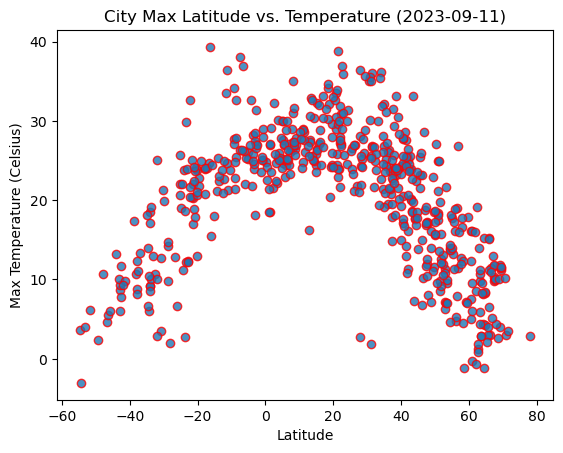

In [11]:
date = time.strftime("%Y-%m-%d")

# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

# First impressions of plot: max temperature higher closer to the Equator (Latitude = 0)

#### Latitude Vs. Humidity

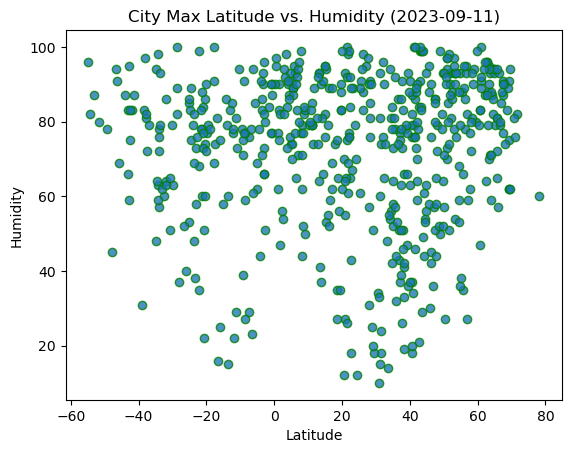

In [12]:
date = time.strftime("%Y-%m-%d")

# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="green",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

# First impressions of plot: Not much correlation between Latitude and Humidity, spread all over the place

#### Latitude Vs. Cloudiness

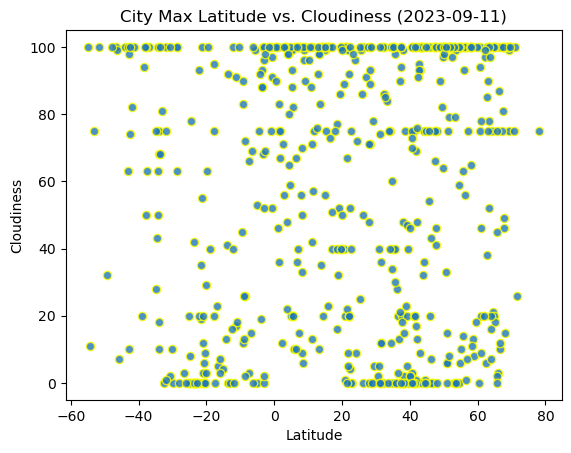

In [13]:
date = time.strftime("%Y-%m-%d")

# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="yellow",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

# First impressions of plot: Not much correlation between latitude and cloudiness, scattered around the place.

#### Latitude vs. Wind Speed Plot

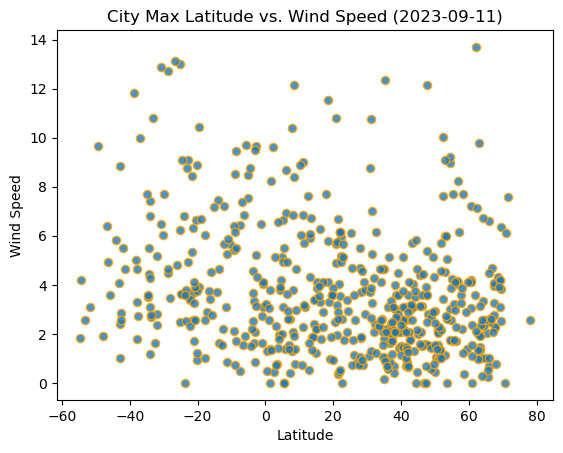

In [14]:
date = time.strftime("%Y-%m-%d")

# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

# First impressions of plot: Not much correlation between Latitude and Wind Speed

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
    
    # Compute linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mariupol,47.0667,37.5000,18.79,57,100,1.59,UA,1694462852
4,utrik,11.2278,169.8474,28.97,79,42,9.01,MH,1694462910
6,pacific grove,36.6177,-121.9166,26.33,86,20,5.14,US,1694462911
9,hawaiian paradise park,19.5933,-154.9731,24.46,88,100,3.60,US,1694462911
10,tidjikja,18.5564,-11.4271,34.18,35,77,4.13,MR,1694462912


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,-3.04,82,11,4.20,GS,1694462910
2,hermanus,-34.4187,19.2345,6.00,63,63,4.46,ZA,1694462664
3,margaret river,-33.9500,115.0667,17.06,78,68,7.43,AU,1694462910
5,port-aux-francais,-49.3500,70.2167,2.31,78,32,9.67,TF,1694462911
7,ushuaia,-54.8000,-68.3000,3.57,96,100,1.84,AR,1694462911


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.5550616148773684


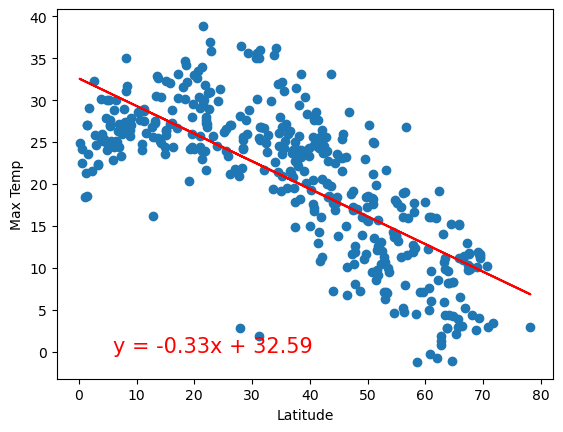

In [18]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]
plot_linear_regression(x_value, y_value, "Max Temp", (6, 0))

# r-value indicates moderately strong correlation.

The r-value is 0.6484491411705064


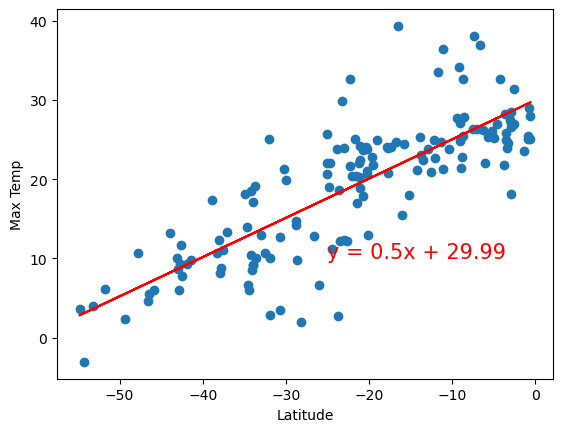

In [19]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]
plot_linear_regression(x_value, y_value, "Max Temp", (-25, 10))

# r-value indicates moderately strong correlation.

**Discussion about the linear relationship:** For both the northern and southern hemisphere, there is a moderately strong linear association between Latitude and Max Temperature. 
As the Latitude approaches zero, the Max Temperature generally increases.
Both r-values of different hemispheres support this association (being around if not above r-squared = 0.5).

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.003069015424371255


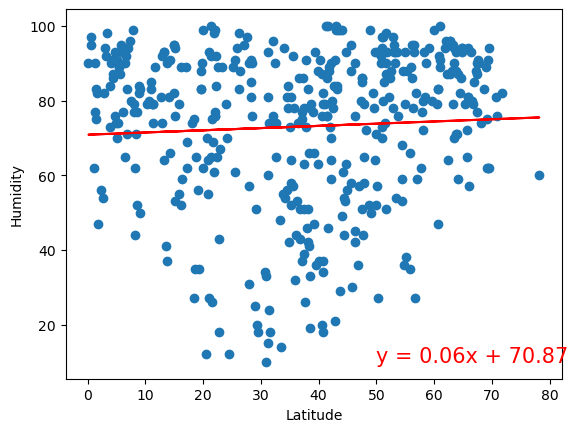

In [20]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]
plot_linear_regression(x_value, y_value, "Humidity", (50, 10))

# r-value indicates very little to no correlation.

The r-value is 0.008330113878498737


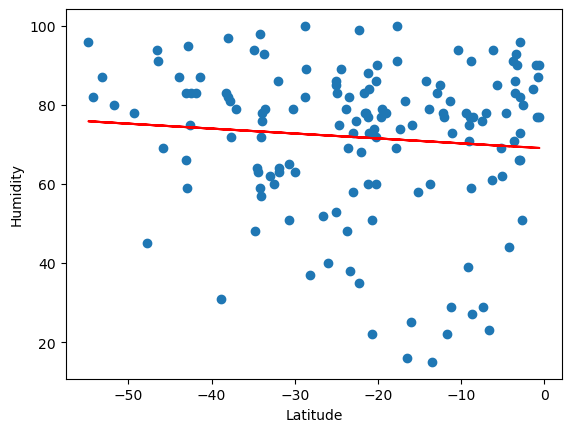

In [21]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
plot_linear_regression(x_value, y_value, "Humidity", (-55, 10))

# r-value indicates very little to no correlation.

**Discussion about the linear relationship:** For both the northern and southern hemisphere, there is little to no linear
association between Latitude and Humidity. 
No discernable trend could be observed between Latitude and Humidity.
Both r-values of different hemispheres support this association (very close to r-squared values of 0).

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.00033334766480480133


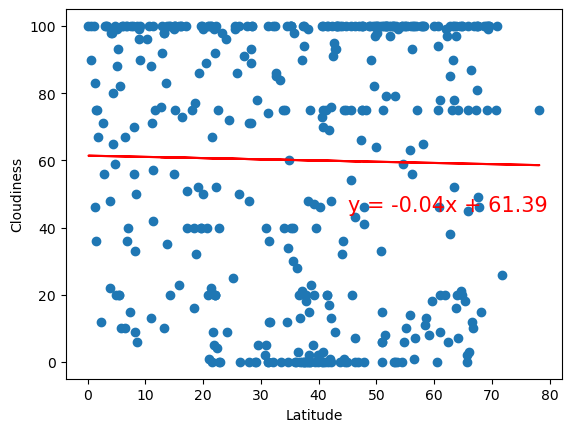

In [22]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_value, y_value, "Cloudiness", (45, 45))

# r-value indicates very little to no correlation.

The r-value is 0.008079831037819597


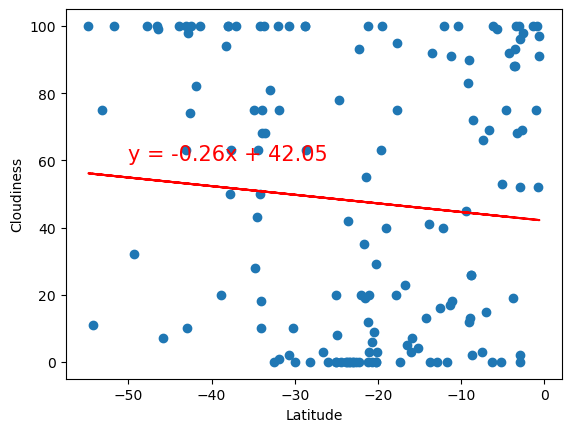

In [23]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_value, y_value, "Cloudiness", (-50, 60))

# r-value indicates very little to no correlation.

**Discussion about the linear relationship:** For both the northern and southern hemisphere, there is little to no linear
association between Latitude and Cloudiness. 
No discernable trend could be observed between Latitude and Cloudiness.
Both r-values of different hemispheres support this association (very close to r-squared values of 0),
though it is worth noting a linear trend is slightly more noticeable in the Southern hemisphere compared to the North.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.006333908230669262


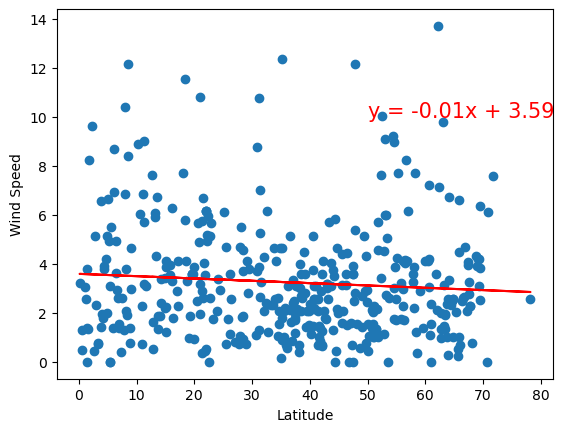

In [24]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_value, y_value, "Wind Speed", (50, 10))

# r-value indicates very little to no correlation.

The r-value is 0.001629647375501798


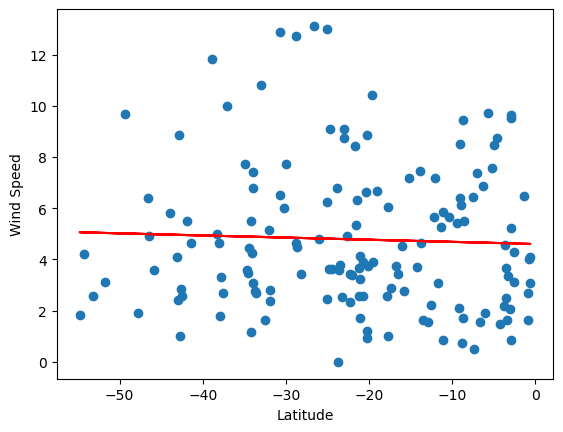

In [25]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_value, y_value, "Wind Speed", (-30, 20))

# r-value indicates very little to no correlation.

**Discussion about the linear relationship:** For both the northern and southern hemisphere, there is little to no linear
association between Latitude and Wind Speed. 
No discernable trend could be observed between Latitude and Wind Speed.
Both r-values of different hemispheres support this association (very close to r-squared values of 0).